In [1]:
import pandas as pd

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"  # Dataset URL
data = pd.read_csv(url, header=None) 

In [14]:
data.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [15]:
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
## we will try to predict class of the wine 
# splitting the dataset intpfeatures and target variable(e.g. class)
X = data.iloc[:,1:]
y = data.iloc[:,:1]

In [29]:
data.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
## scaling the dataset
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
## implemennt PCA
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [52]:
explained_variance = pca.explained_variance_ratio_

In [53]:
components = explained_variance.cumsum() < 0.9  # Find components below threshold
optimal_components = len(explained_variance[~components]) + 1  # Number of components to retain


In [54]:
optimal_components

1

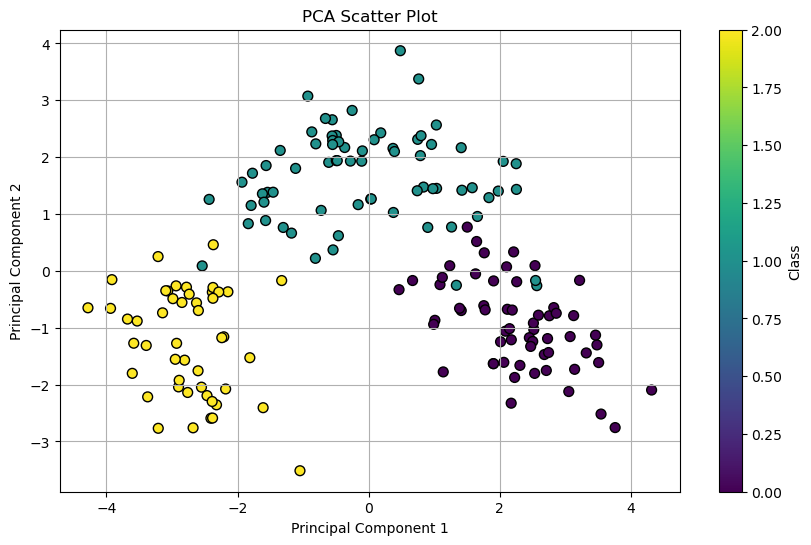

In [58]:
# Visualize the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,  cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [61]:
from sklearn.cluster import KMeans

# Perform K-Means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters based on the dataset
kmeans.fit(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

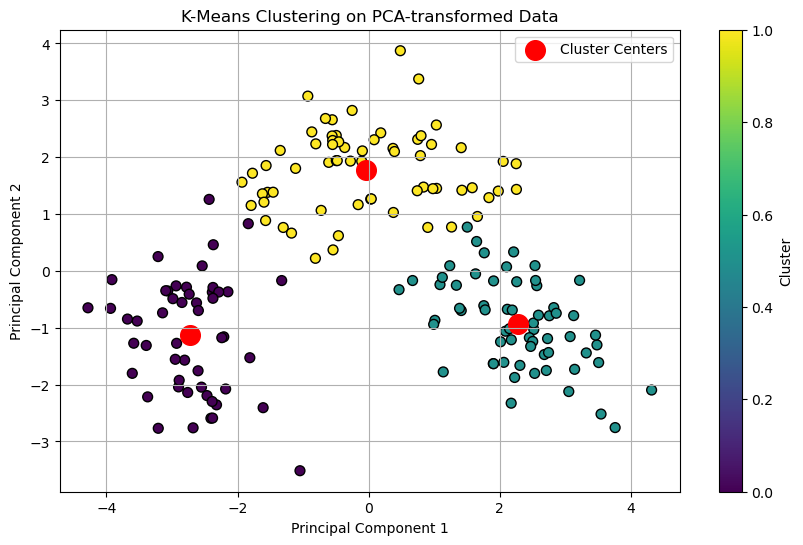

In [63]:
# Visualize the clustering results on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

Interpretation of the results:

- In the PCA scatter plot, we can observe how the wine samples are distributed in the reduced 2-dimensional space based on their principal components. The separation or clustering of points may indicate inherent structure or patterns in the data.
- In the K-Means clustering plot, we see how the samples are clustered based on the principal components. The centroids of the clusters represent the mean position of the samples assigned to each cluster. We can interpret these clusters based on their characteristics or properties in the original feature space.

In [65]:
from sklearn.metrics import silhouette_score, completeness_score
from sklearn.metrics import pairwise_distances_argmin_min

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

# Calculate inertia
inertia = kmeans.inertia_

# Calculate completeness score
cluster_centers_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_pca)
completeness_avg = completeness_score(y, kmeans.labels_)

# Create a table to display the performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Inertia', 'Completeness Score'],
    'Value': [silhouette_avg, inertia, completeness_avg]
})

print("Performance Metrics for Clustering Algorithm:")
print(performance_metrics)


Performance Metrics for Clustering Algorithm:
               Metric       Value
0    Silhouette Score    0.369076
1             Inertia  825.020838
2  Completeness Score    0.872964
